In [1]:
import sys
!{sys.executable} -m pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 14.0 MB 57 kB/s eta 0:00:016
     |████████████████████████████████| 215 kB 60 kB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 88 kB/s eta 0:00:014
     |████████████████████████████████| 6.9 MB 139 kB/s eta 0:00:01


# SERS and Raman data calibration and alignment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as rpd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Read the data

### Indene and Raman

#### Background

In [ ]:
f_sup_785_650, back_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr650.tif")

In [6]:
f_sup_785_1250, back_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr1250.tif")

In [7]:
f_sup_785_1850, back_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr1850.tif")

#### Indene

In [8]:
f_sup_785_650, indene_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr650 2min 10x PlanN 32mW.tif")

In [9]:
f_sup_785_1250, indene_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr1250 2min 10x PlanN 32mW.tif")

In [10]:
f_sup_785_1850, indene_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr1850 2min 10x PlanN 32mW.tif")

#### Carbendazim Raman

Pay attention that it is 2 min integration time. Probably for good comparison you will have to normalize it.

In [11]:
f_sup_785_650, car_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr650 2min 10x PlanN 32mW.tif")

In [12]:
f_sup_785_1250, car_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr1250 2min 10x PlanN 32mW.tif")

In [13]:
f_sup_785_1850, car_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr1850 2min 10x PlanN 32mW.tif")

#### Background for Thiacloprid and Acetamiprid; 20 secs 4 avg

In [14]:
f_sup_background_20s_4avg, background_20s_4avg = rd.read_data("data/20220816 Analyte 532 Raman/background 20s 4avg.tif")

#### Thiacloprid Raman

In [15]:
f_sup_532_100um_fiber, thia_raman_20s = rd.read_data("data/20220816 Analyte 532 Raman/No2 Thiacloprid powder/20s 4avg 100um fiber HWP42 MR-Newton ctr1400.tif")

#### Acetamiprid Raman

In [16]:
f_sup_532_100um_fiber, aceta_raman_20s = rd.read_data("data/20220816 Analyte 532 Raman/No4 Acetamiprid powder/20s 4avg 100um fiber HWP42 MR-Newton ctr1400.tif")

### Analytes SERS

#### 1 - Carbendazim

In [17]:
f_sup, car_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, car_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, car_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_3.tif")

#### 2 - Thiacloprid

In [18]:
f_sup, thia_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, thia_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, thia_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_3.tif")

#### 4 - Acetamiprid

In [19]:
f_sup, aceta_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_1.tif")
f_sup, aceta_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_2.tif")
f_sup, aceta_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_3.tif")

## Visualize the data

#### Carbendazim: Raman and SERS

In [80]:
# Indene peaks
indene_peaks = [203, 381, 534, 592, 730, 861, 1019, 1068,
                1153, 1205, 1226, 1288, 1312, 1361, 1457, 1588, 1609]

indene_true_peaks = [180, 340, 480, 540, 680, 815, 989, 1048]

text_pos= [730, 1018, 1205, 1361, 1393, 1458, 1553, 1610]
text = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# carbendazim_peaks = []

y_pos = 30000  # y position of the text
rotation_angle = 65  # angle of the text rotation

In [ ]:
plt.plot(indene_true_peaks, indene_true_peaks)
plt.plot(indene_true_peaks, indene_peaks[5,7, ])

Text(0, 0.5, 'Intensity counts')

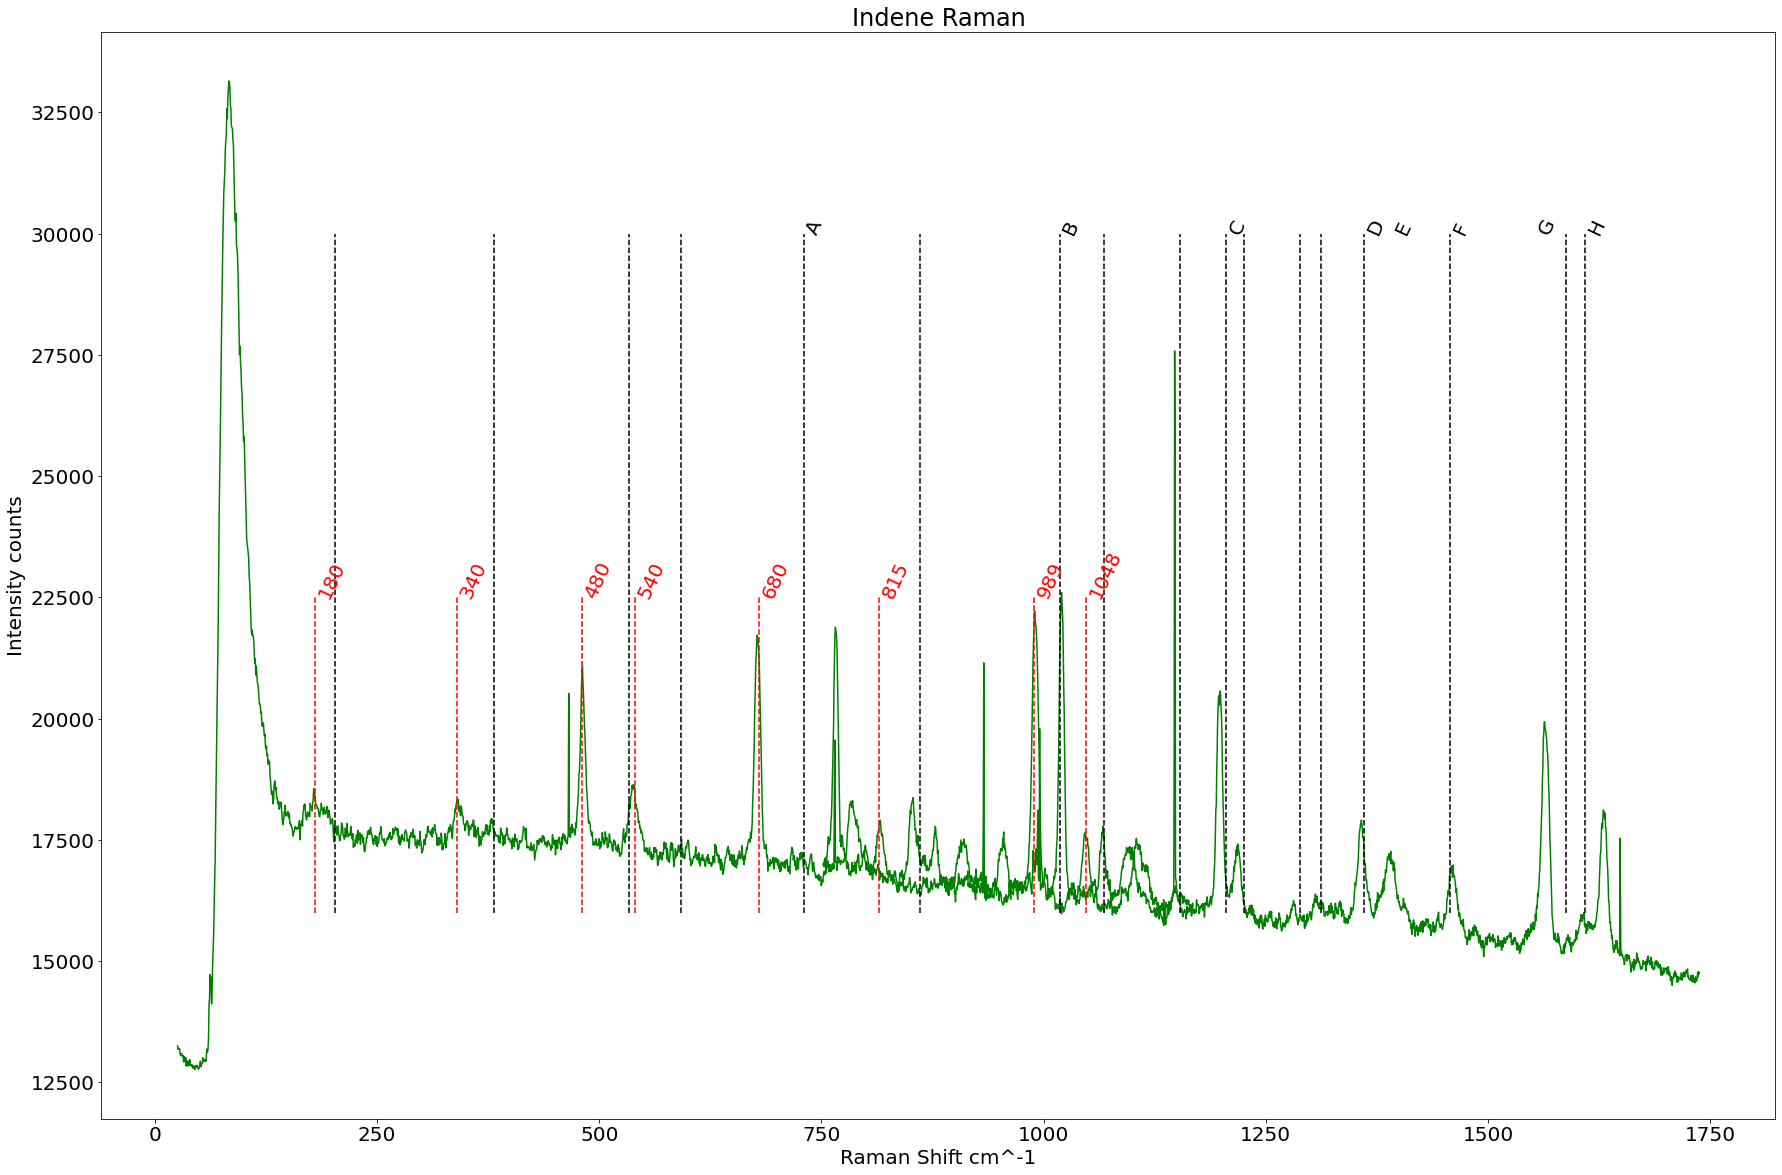

In [85]:
# Used only 650 and 1250 because Indene peaks went only till 1600
plt.figure(figsize=(30,20))
# plt.plot(f_sup_785_650, car_650, color='blue')
# plt.plot(f_sup_785_1250, car_1250, color='blue')
plt.plot(f_sup_785_650, indene_650 + 10000, color='green')
plt.plot(f_sup_785_1250 + 40, indene_1250 + 10000, color='green')
plt.vlines(x=indene_peaks, ymin=16000, ymax=y_pos, colors="k", linestyles="dashed")
plt.vlines(x=indene_true_peaks, ymin=16000, ymax=22500, color='r', linestyles='dashed')
# for peak_pos, peak_label in enumerate(indene_peaks):
#     plt.text(indene_peaks[peak_pos], y_pos, str(peak_label), rotation=rotation_angle)

for true_peak in indene_true_peaks:
    plt.text(x=true_peak, y=22500, s=str(true_peak), rotation=rotation_angle, color="red")

for idx, true_peak in enumerate(text_pos):
    plt.text(x=true_peak, y=30000, s=text[idx], rotation=rotation_angle, color='black')

# plt.vlines(x=[1100], y=)
plt.rc('font', size=20)
plt.title("Indene Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')

In [ ]:
# Compare overlaping wavenumbers
diff = np.abs(f)

#### Thiacloprid: Raman and SERS

In [ ]:
# Thiacloprid peaks
indene_peaks = [203, 381, 534, 592, 730, 861, 1019, 1068,
                1153, 1205, 1226, 1288, 1312, 1361, 1457, 1588, 1609]

# Add peaks labels text to the plot
text = str(indene_peaks)
y_pos = 30000  # y position of the text
rotation_angle = 65  # angle of the text rotation